# Wine Quality Preprocessing (Remove Outliers)

Made by: Anthony Kevin Oktavius

Library Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
import plotly
import plotly.express as px
import shap
import hyperopt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Dataset Import

In [7]:
red_wine_dataset = pd.read_csv("winequality-red.csv", sep = ';')
red_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
white_wine_dataset = pd.read_csv("winequality-white.csv", sep = ';')
white_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Define All Fields

In [9]:
fixed_acidity_field = "fixed acidity"
volatile_acidity_field = "volatile acidity"
citric_acid_field = "citric acid"
residual_sugar_field = "residual sugar"
chlorides_field = "chlorides"
free_sulfur_dioxide_field = "free sulfur dioxide"
total_sulfur_dioxide_field = "total sulfur dioxide"
density_field = "density"
ph_field = "pH"
sulphates_field = "sulphates"
alcohol_field = "alcohol"
quality_field = "quality"

Define Categorical and Numerical Features

In [10]:
numerical_features = [fixed_acidity_field, volatile_acidity_field, citric_acid_field,
                      residual_sugar_field, chlorides_field, free_sulfur_dioxide_field,
                      total_sulfur_dioxide_field, density_field, ph_field, sulphates_field]
categorical_features = [quality_field]

Define Target And Label Fields

In [11]:
labels = numerical_features.copy()
target = categorical_features.copy()

In [12]:
x_white = white_wine_dataset[labels]
x_red = red_wine_dataset[labels]

y_white = white_wine_dataset[target]
y_red = red_wine_dataset[target]

## Pre Data Visualization



Before Applying Several Techniques, we can use data visualization to determine what our data distribution looks like.

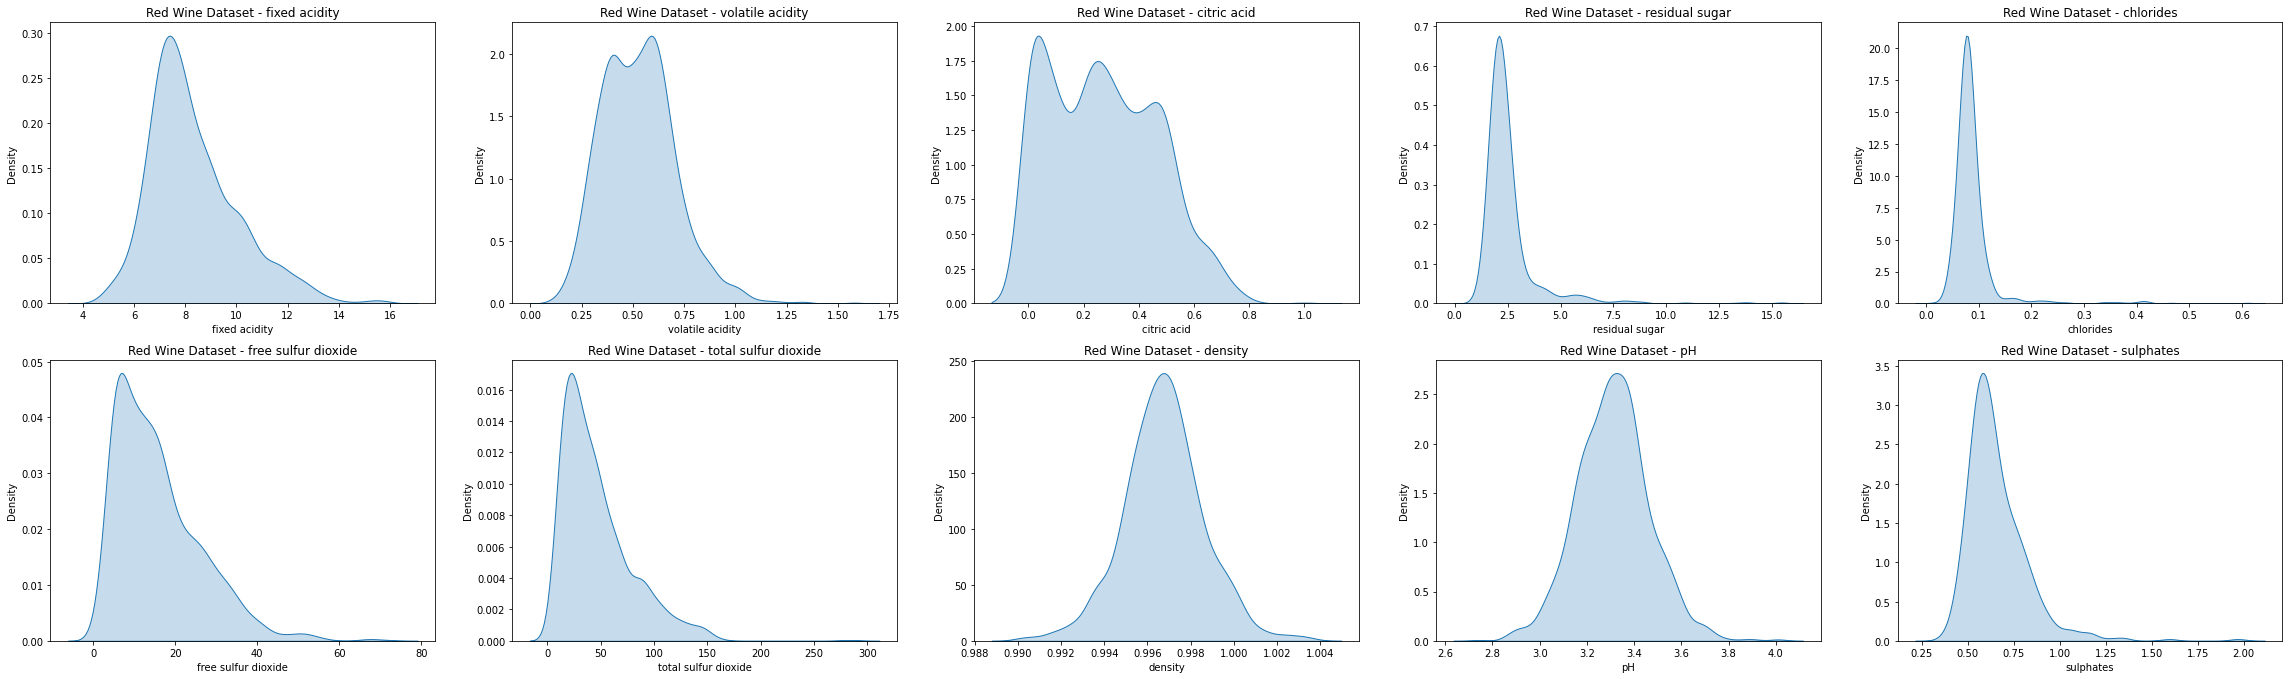

In [28]:
plt.figure(figsize=(40, 30))

for index, numerical_field in enumerate(numerical_features):
    plt.subplot(5, 5, index + 1)
    plt.title(f"Red Wine Dataset - {numerical_field}")
    sns.kdeplot(x = red_wine_dataset[numerical_field], palette = "cubehelix_r", shade=True)
plt.show()

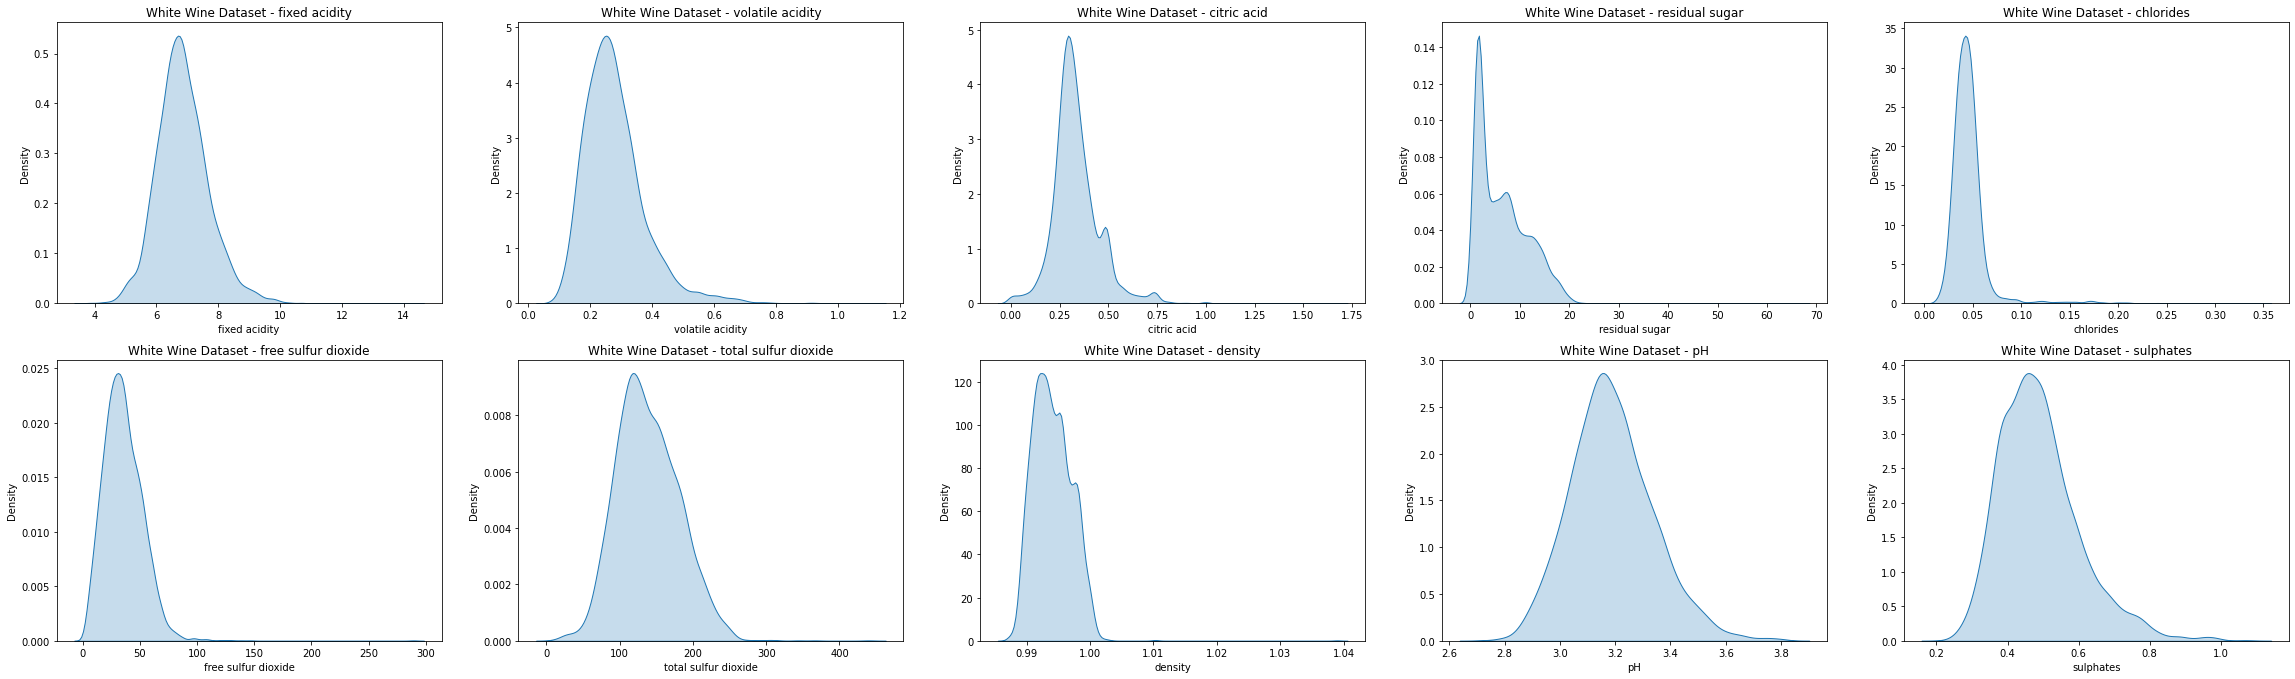

In [29]:
plt.figure(figsize=(40, 30))

for index, numerical_field in enumerate(numerical_features):
    plt.subplot(5, 5, index + 1)
    plt.title(f"White Wine Dataset - {numerical_field}")
    sns.kdeplot(x = white_wine_dataset[numerical_field], palette="cubehelix_r", shade=True)
plt.show()

## Remove Outliers

Based on the plot above, most of the data are skewed/ not a normal distribution.

In this section, I'm going to look at Wine Quality Removing Outlier Technique. In our case, we are going to look at automatic outlier detection.

Traditional outlier removal works best when we have a data with less number of features. We can easily configure outlier removal parameters to achieve the best result for our data. Some examples on traditional outlier removal are IQR Method and Z-Score.

When dealing with a large number of features, it's quite difficult to determine the best parameters for manual removal outlier technique. Furthermore, it's also quite difficult to visualize what data that has been removed by manual removal outlier technique, so it's harder for us to tune the manual removal outlier parameters. Which means, in this case, we're going to look at some of the automated algorithms for removing outliers.

Below are the methods that we are going to use.
* Isolation Forest
* One Class SVM
* Local Outlier Factor

Isolation Forest

Minimum Covariant Determinant

Local Outlier Factor

## Post Data Visualization